In [15]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import scipy.spatial.distance as sd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

#Load the file
file="new_dataset_2.txt"
data = np.loadtxt(file,dtype='float')

In [16]:
#Distance Matrix
def distance_matrix_calc(data):
    dist_mat = np.zeros((data.shape[0],data.shape[0]))
    dist_mat = sd.cdist(data, data, metric = 'euclid')
    return dist_mat

In [17]:
#Assign the Clusters
def assign_cluster(clusters,gene_index):
    for i,cluster in enumerate(clusters):
        if gene_index in cluster:
            return i

In [18]:
#New Cluster Assignment
def new_cluster(dist_matrix, flag, no_of_points, t_label):
    for i in range(flag):
        minimum=np.min(dist_matrix[np.nonzero(dist_matrix)])
        position=np.where(dist_matrix == minimum)
        x_cordinate=position[0][0]
        y_cordinate=position[1][0]
        x_cluster = assign_cluster(t_label,x_cordinate)
        y_cluster = assign_cluster(t_label,y_cordinate)
        t_label[x_cluster]=t_label[x_cluster] + t_label[y_cluster]
        t_label.pop(y_cluster)
        
        for p in range(no_of_points):
            dist_matrix[x_cordinate][p] = min(dist_matrix[x_cordinate][p],dist_matrix[y_cordinate][p])
            dist_matrix[p][x_cordinate] = min(dist_matrix[p][x_cordinate],dist_matrix[p][y_cordinate])
            dist_matrix[y_cordinate][p] = np.inf
            dist_matrix[p][y_cordinate] = np.inf
            dist_matrix[p][p] =0

        final_cluster_vals =np.zeros(no_of_points,dtype=int)
    cluster_name=1;

    for cluster in t_label:
        for p in cluster:
            final_cluster_vals[p]=cluster_name
        cluster_name=cluster_name+1

    return final_cluster_vals

In [19]:
#Plotting the clusters
def plots(pca_data,assigned_cluster,file):
    df_new = pd.DataFrame({'y1':np.array(pca_data)[:,0], 'y2':np.array(pca_data)[:,1], 'clusters': assigned_cluster})
    sns.lmplot(x='y1', y='y2', data=df_new, fit_reg=False,hue='clusters',palette = 'dark', height=5,aspect = 1.5,legend_out = False)
    plt.title(file)
    plt.show()

In [20]:
#Calculating m values using ground truth values and Hierarchial cluster values
def get_count(points,final_cluster_vals,ground_truth):
    tp = 0
    tn = 0
    fp=0
    fn=0
    for i in range(len(data)):
        for j in range(len(data)):
            if ground_truth[i]==ground_truth[j]:
                if final_cluster_vals[j]:
                    tp = tp + 1
                else:
                    fn = fn +1
            elif ground_truth[i]!=ground_truth[j]:
                if final_cluster_vals[i]==final_cluster_vals[j]:
                    fp = fp +1
                else:
                    tn = tn+1
    return tp,tn,fp,fn

Enter the number of clusters
3


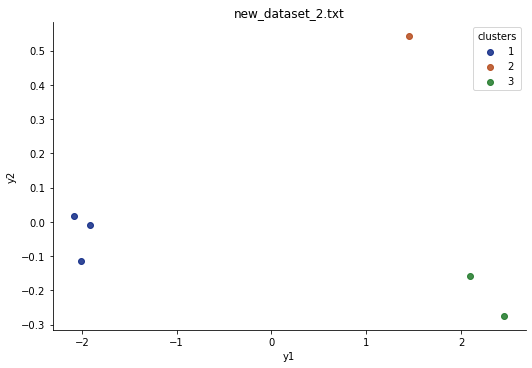

Hierarchical Agglomerative Clustering Results 
--------------------------------------------
Rand Index for file new_dataset_2.txt is 1.0
Jaccard Coefficient for file new_dataset_2.txt is 1.0


In [21]:
#Main Function
def __main__():
    
    print('Enter the number of clusters')
    k = int(input())
    points= data[:,2:]
    dist_matrix = distance_matrix_calc(points)
    num_points=len(points)
    ground_truth = data[:,1]
    flag = num_points - k 
    t_label =[]
    for i in range(num_points):
        t_label.append([i])

    #Final Cluster points
    final_cluster_vals = new_cluster(dist_matrix, flag, num_points, t_label)
    
    #PCA Part
    pca_data = PCA(n_components=2).fit_transform(points)
    
    #Scatter plots of clusters
    plots(pca_data, final_cluster_vals, file)
    
    #Dendogram Construction
#     z = linkage(points,'ward')
#     dendrogram(z,truncate_mode='lastp',p=12,leaf_rotation=45,leaf_font_size=15.,show_contracted=True)
#     plt.title('Dendrogram')
#     plt.xlabel('Cluster Size')
#     plt.ylabel('Distance')
#     plt.axhline(y=500)
#     plt.axhline(y=150)
#     plt.show()

    #External_indices
    tp,tn,fp,fn = get_count(points,final_cluster_vals,ground_truth)
    
    #Rand Index
    rand_index = (tp+tn)/(tp+tn+fp+fn)
    
    #Jaccard Coefficient
    j_coeff=(tp)/(tp+fp+fn)
    
    print("Hierarchical Agglomerative Clustering Results ")
    print("--------------------------------------------")
    print("Rand Index for file {} is {}".format(file,str(rand_index)))
    print("Jaccard Coefficient for file {} is {}".format(file,str(j_coeff)))
    
__main__()